In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Add, Activation
# from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt

from tensorflow.keras.losses import CategoricalCrossentropy


# to study
import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [3]:
print(train_images.shape)


(60000, 28, 28)


In [4]:

def print_raw_data_img(num_image):
    img = train_images[num_image]
    print(img)

print_raw_data_img(42)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1  26 111 195 230
   30   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  28 107 195 254 25

In [5]:
array_a  = np.array([[0,1,2], [3,4,5], [6,7,8]])

max_value = np.max(array_a)
print(max_value)

print(array_a.shape) # (2,3)
print(array_a) # (2,3)
print(array_a[1][1]) # 4 prima riga prima colonna

# nornalizzazione
array_a = (array_a / max_value)

print(array_a.shape)
print(array_a)
print(array_a[1][1])


# Appiattimento
array_a = array_a.reshape(-1, 1)

print(array_a.shape)
print(array_a)




8
(3, 3)
[[0 1 2]
 [3 4 5]
 [6 7 8]]
4
(3, 3)
[[0.    0.125 0.25 ]
 [0.375 0.5   0.625]
 [0.75  0.875 1.   ]]
0.5
(9, 1)
[[0.   ]
 [0.125]
 [0.25 ]
 [0.375]
 [0.5  ]
 [0.625]
 [0.75 ]
 [0.875]
 [1.   ]]


In [6]:
# Preprocessing dei dati

# normalizzazione
train_images = (train_images / 255)
test_images = (test_images / 255)

# appiattimento di ogni immagine da un array 28x28 ad un array di 784 pixel
train_images = train_images.reshape(-1, 28*28) # 784
test_images = test_images.reshape(-1, 28*28)


In [7]:
# trasformazione delle label tramite hot-encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [8]:
# creazione del modello
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(784,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))

model.add(Dense(10, activation='softmax'))

# compilazione del modello
model.compile(
    optimizer=Adam(learning_rate=0.005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)



model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 16)                272       
                                                                 
 dense_6 (Dense)             (None, 16)                2

2024-01-13 12:01:08.536287: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-01-13 12:01:08.536304: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2024-01-13 12:01:08.536308: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2024-01-13 12:01:08.536331: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-01-13 12:01:08.536345: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
history = model.fit(
    x=train_images, # training dataset
    y=train_labels, # training labels
    epochs=50,
    batch_size=512,
    validation_data=(
        test_images, # testing dataset
        test_labels  # testing labels
    )
)


Epoch 1/50
  1/118 [..............................] - ETA: 41s - loss: 2.4077 - accuracy: 0.0762

2024-01-13 12:01:08.929018: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


118/118 [==============================] - 2s 15ms/step - loss: 2.0366 - accuracy: 0.3874 - val_loss: 2.0091 - val_accuracy: 0.4657
Epoch 2/50
118/118 [==============================] - 2s 14ms/step - loss: 16.4589 - accuracy: 0.3865 - val_loss: 34.8269 - val_accuracy: 0.4207
Epoch 3/50
118/118 [==============================] - 2s 13ms/step - loss: 8214.7705 - accuracy: 0.2901 - val_loss: 65140.7422 - val_accuracy: 0.1496
Epoch 4/50
118/118 [==============================] - 2s 14ms/step - loss: 9993432.0000 - accuracy: 0.2051 - val_loss: 42860412.0000 - val_accuracy: 0.2585
Epoch 5/50
118/118 [==============================] - 2s 13ms/step - loss: 530874624.0000 - accuracy: 0.2296 - val_loss: 1395483648.0000 - val_accuracy: 0.1729
Epoch 6/50
118/118 [==============================] - 1s 12ms/step - loss: 9581527040.0000 - accuracy: 0.2153 - val_loss: 40033026048.0000 - val_accuracy: 0.2266
Epoch 7/50
118/118 [==============================] - 1s 12ms/step - loss: 40470487040.0000 - a

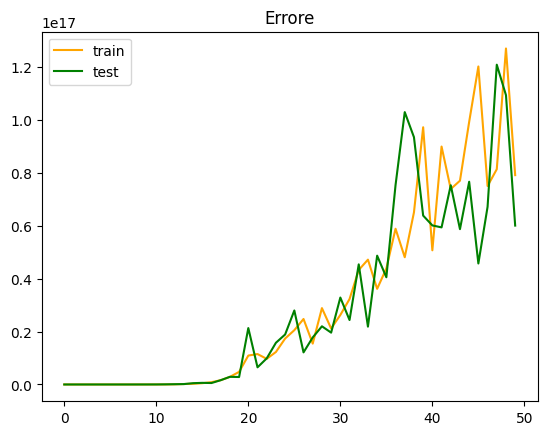

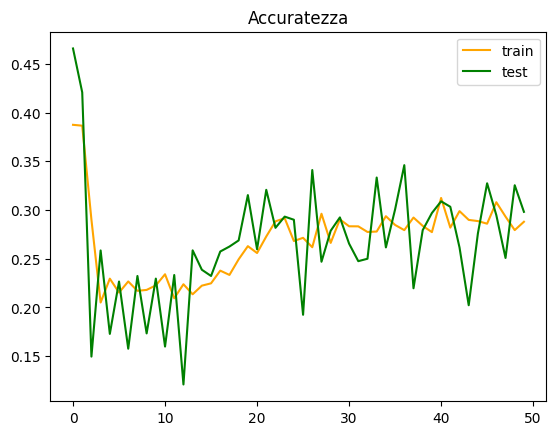

In [10]:
# stampe risultati

# errore modello
plt.plot(history.history['loss'], color='orange', label='train')
plt.plot(history.history['val_loss'], color='green', label='test')
plt.title('Errore')
plt.legend()
plt.show()

# Accuratezza del modello
plt.plot(history.history['accuracy'], color='orange', label='train')
plt.plot(history.history['val_accuracy'], color='green', label='test')
plt.title("Accuratezza")
plt.legend()
plt.show()

In [11]:
# Valutazione del modello
evaluations = model.evaluate(
    test_images,
    test_labels
)

for i in range(0, len(model.metrics_names)):
    print(f"{model.metrics_names[i]} -> {evaluations[i]}")


313/313 [==============================] - 2s 7ms/step - loss: 60065242188611584.0000 - accuracy: 0.2981
loss -> 6.006524218861158e+16
accuracy -> 0.29809999465942383


In [12]:
### RESIDUAL NETWORK 
### Use Function API di Keras
shape_value = train_images.shape[1] # 28x28 -> 784
print(shape_value)

input = Input(shape=(shape_value)) # posso creare anche custom objects che userò successivamente senza ripetere tutto.

dense_16_relu = Dense(units=16, activation='relu') 

dense_0 = dense_16_relu(input)
dense_1 = Dense(units=16, activation='relu')(dense_0)
dense_2 = Dense(units=16)(dense_1)

residual_0 = Add()([dense_0, dense_2])
residual_0 = Activation('relu')(residual_0) # torna indietro con la derivata prima parziale della funzione relu

dense_3 = Dense(units=16, activation='relu')(residual_0)
dense_4 = Dense(units=16, activation='relu')(dense_3)
dense_5 = Dense(units=16)(dense_4)

residual_1 = Add()([dense_3, dense_5])
residual_1 = Activation('relu')(residual_1)

dense_6 = Dense(units=16, activation='relu')(residual_1)
dense_7 = Dense(units=16, activation='relu')(dense_6)
dense_8 = Dense(units=16)(dense_7)

residual_2 = Add()([dense_6, dense_8])
residual_2 = Activation('relu')(residual_2)

output = Dense(units=10, activation='softmax')(residual_2)

model = tf.keras.models.Model(
    inputs=[input],
    outputs=[output],
    name='ResNet'
)

784


In [13]:
# compilazione del modello
model.compile(
    optimizer=Adam(learning_rate=0.005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "ResNet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 784)]                0         []                            
                                                                                                  
 dense_10 (Dense)            (None, 16)                   12560     ['input_1[0][0]']             
                                                                                                  
 dense_11 (Dense)            (None, 16)                   272       ['dense_10[0][0]']            
                                                                                                  
 dense_12 (Dense)            (None, 16)                   272       ['dense_11[0][0]']            
                                                                                             

In [14]:
history_res = model.fit(
    x=train_images,
    y=train_labels,
    epochs=50,
    batch_size=512,
    validation_data=(
        test_images,
        test_labels
    )
)

Epoch 1/50
118/118 [==============================] - 2s 14ms/step - loss: 1.1412 - accuracy: 0.5998 - val_loss: 0.7485 - val_accuracy: 0.7674
Epoch 2/50
118/118 [==============================] - 2s 13ms/step - loss: 2.0964 - accuracy: 0.3390 - val_loss: 1.9839 - val_accuracy: 0.2201
Epoch 3/50
118/118 [==============================] - 2s 13ms/step - loss: 1.7054 - accuracy: 0.3882 - val_loss: 1.3986 - val_accuracy: 0.5404
Epoch 4/50
118/118 [==============================] - 2s 13ms/step - loss: 1.4636 - accuracy: 0.5204 - val_loss: 2.4290 - val_accuracy: 0.1151
Epoch 5/50
118/118 [==============================] - 2s 13ms/step - loss: 1.8291 - accuracy: 0.3247 - val_loss: 1.5268 - val_accuracy: 0.4497
Epoch 6/50
118/118 [==============================] - 2s 13ms/step - loss: 1.4921 - accuracy: 0.4482 - val_loss: 1.4016 - val_accuracy: 0.4714
Epoch 7/50
118/118 [==============================] - 2s 13ms/step - loss: 1.2455 - accuracy: 0.5426 - val_loss: 1.0754 - val_accuracy: 0.6154

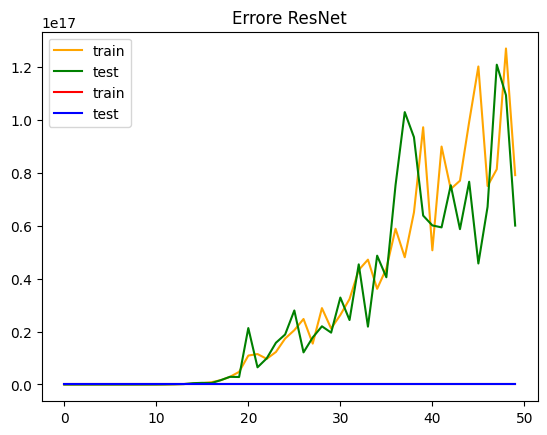

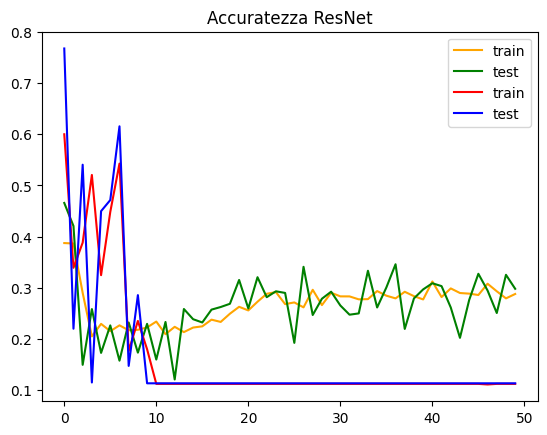

In [17]:
# Stampe i risultati

# errore modello
plt.plot(history.history['loss'], color='orange', label='train')
plt.plot(history.history['val_loss'], color='green', label='test')
plt.plot(history_res.history['loss'], color='red', label='train')
plt.plot(history_res.history['val_loss'], color='blue', label='test')
plt.title('Errore ResNet' )
plt.legend()
plt.show()

# Accuratezza del modello
plt.plot(history.history['accuracy'], color='orange', label='train')
plt.plot(history.history['val_accuracy'], color='green', label='test')
plt.plot(history_res.history['accuracy'], color='red', label='train')
plt.plot(history_res.history['val_accuracy'], color='blue', label='test')
plt.title("Accuratezza ResNet")
plt.legend()
plt.show()


In [16]:
evaluations_res = model.evaluate(
    test_images,
    test_labels
)

for i in range(0, len(model.metrics_names)):
    print(f"{model.metrics_names[i]} -> {evaluations_res[i]}")

313/313 [==============================] - 2s 7ms/step - loss: 2.3011 - accuracy: 0.1135
loss -> 2.3011152744293213
accuracy -> 0.11349999904632568
